# Implement NN from scratch

Input of a neuron is the weighted sum of the previous layer. 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image
import math
np.random.seed(1)

* Every neuron is connected to next layer of neurons and each connection has unique weight
* Each Neuron has unique bias

So for  NN with: 10, 16, 16, 16, 2 layer sizez we have:
* Weights: 704
* Biases: 60
 ALL trainable params: 764
 

# Basic Code of NN

## Code a Neuron
Below we have just one neuron whitch has 3 inpurs with weights + bias

In [58]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]

bias = 2


output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias 
output

2.3

## Code a Layer

output -> 4 neurons

input layer -> 3 neurons


inputs as outpusts from previous layer and they cannot cahnge

we can tweak weights and biases

In [59]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]


what is dot product ?

a = [1, 2, 3]

b = [2, 3, 4]

dot_product = a[0]*b[0] + a[1]*b[1] + a[2]*b[2] = 20

multiplying element wise and then sum to get single number

In [60]:
output = np.dot(weights, inputs) + biases
output

array([4.8  , 1.21 , 2.385])

so we have the outpust from our layer with 3 neurons

In [61]:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
          
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

In [62]:
output = np.dot(inputs, np.array(weights).T) + biases
output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

First time we could make dot product because the weights were matrix (3, 4) and the inputs were vector (4,) so we can apply it

Now we have two matrixes (3, 4) and (3, 4) for the inputs. In order to apply dot product we TRANSPOSE the weights so it can be (4, 3)

## Build 2 Layers

In [63]:
inputs_layer_one = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
          
weights_layer_one = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases_layer_one = [2, 3, 0.5]


weights_layer_two = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]

biases_layer_two = [-1, 2, -0.5]

In [64]:
output_layer_one = np.dot(inputs_layer_one, np.array(weights_layer_one).T) + biases_layer_one

output_layer_two = np.dot(output_layer_one, np.array(weights_layer_two).T) + biases_layer_two

output_layer_one, output_layer_two

(array([[ 4.8  ,  1.21 ,  2.385],
        [ 8.9  , -1.81 ,  0.2  ],
        [ 1.41 ,  1.051,  0.026]]), array([[ 0.5031 , -1.04185, -2.03875],
        [ 0.2434 , -2.7332 , -5.7633 ],
        [-0.99314,  1.41254, -0.35655]]))

# OOP Code of Layer

When we initialize biases and weights we need them to be small in order to not reach Exploding gradient problem.

Biases tend to be 0.

Thats why we need also to normalize out input data. The meaning stays the same but the scale changes.

In [65]:
X = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

In [66]:
class Layer_Dense:
  '''
  initialize weights and biases
  n_inputs - number of inputs comming from a previous layer (e.g 4 [1, 2, 3, 2.5])
  n_neurons - number of neurons in the layer
  '''

  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases


In [67]:
layer_1 = Layer_Dense(4, 5)
layer_2 = Layer_Dense(5, 2)


In [68]:
layer_1.forward(X)
print(layer_1.output)
layer_2.forward(layer_1.output)
print(layer_2.output)

[[-0.13421364 -0.37336255 -0.52124832 -0.14815191  0.52250132]
 [-1.19208932  0.92158303 -0.62956776 -0.00822599  0.05158244]
 [-0.29458033 -0.10318954 -0.1624691   0.11697081  0.13037755]]
[[-0.07802372  0.04308894]
 [ 0.15629698 -0.0436015 ]
 [ 0.00355236 -0.03182919]]


# Activation functions

relu can lead to vanishing gradient problem (it is fast, simple and it works)

We use activation function in order to skip non linearity (Relu, Sigmoid)

In order to fit non linear data into NN we need 2 or more hidden layers and non linear activation function.

### RelU

In [69]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
  output.append(max(0, i))

output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [70]:
class Activation_RelU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

In [71]:
def create_dataset(points, classes):
  X = np.zeros((points*classes, 2))
  y = np.zeros(points*classes, dtype="uint8")
  for class_number in range(classes):
    ix = range(points*class_number, points*(class_number+1))
    r = np.linspace(0.0, 1, points) #radius
    t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
  return X, y


In [72]:
X, y = create_dataset(100, 3)

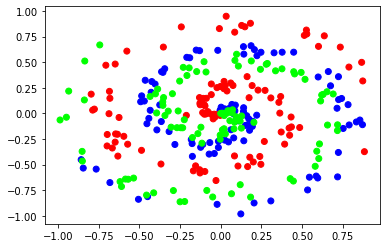

In [73]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.show()

In [74]:
layer_1 = Layer_Dense(X.shape[1], 5)
layer_1.forward(X)
print(layer_1.output)

activation1 = Activation_RelU()
activation1.forward(layer_1.output)


[[ 0.          0.          0.          0.          0.        ]
 [-0.00066435 -0.00215824 -0.00185502 -0.00250928 -0.00226793]
 [-0.00136096 -0.00439429 -0.00360098 -0.00498242 -0.00464202]
 ...
 [-0.06822792 -0.197988   -0.01603193 -0.11926781 -0.22942774]
 [-0.03930148 -0.09774253  0.11099759  0.02669262 -0.12975547]
 [-0.07390812 -0.21968057 -0.05578085 -0.1596758  -0.24929589]]


In [75]:
activation1.output

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11099759, 0.02669262, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

### Softmax

Relu is not good in determination of how wrong is the model.

In [76]:
 v1 = [4.8, 1.21, 2.385]
 v2 = [4.8, 4.7, 4.25]

1. the output of these 2 neurons cannot be compared since they are not connected
2. The boundaries can varry for each example which is running in the network

In [77]:
E = np.math.e

exp_values = []

for value in v1:
  exp_values.append(E**value)

print(exp_values)

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
  norm_values.append(value / norm_base)

print(norm_values)
print(sum(norm_values))

[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


Dog   ->  | e**1 |      | e**1 / (e**1 + e**2 + e**3)|   ->   | 0.09|

      
Cat   ->  | e**2 |  ->  | e**2 / (e**1 + e**2 + e**3) |  -> | 0.24|
      
      
Human ->  | e**3 |      | e**3 / (e**1 + e**2 + e**3) |  ->   | 0.65|

In [78]:
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True)) # batch of inputs we recieve
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True) # sum each of the rows
    self.output = probabilities

In [79]:
layer_1 = Layer_Dense(X.shape[1], 3)
layer_1.forward(X)

activation1 = Activation_RelU()
activation1.forward(layer_1.output)

layer_2 = Layer_Dense(3,3)
layer_2.forward(activation1.output)


activation2 = Activation_Softmax()
activation2.forward(layer_2.output)
print(activation2.output[:5])


[[0.33333333 0.33333333 0.33333333]
 [0.33333051 0.33333218 0.33333731]
 [0.33332725 0.33333187 0.33334087]
 [0.33332454 0.33333051 0.33334495]
 [0.33332509 0.33332485 0.33335006]]


# Calculationg Loss with Categorical Crossentropy

Loss for One Hot encooded target class 

Loss = -Sum(y(true)i.log y(pred)i)

Log in programming is ofte reffered to natural log but here is based log (e)

Logarithm is solving for x in e**x = b


In [80]:
softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0]*target_output[0]+
                softmax_output[1]*target_output[1]+
                softmax_output[2]*target_output[2]))
loss

0.35667494393873245

In [81]:
print(-math.log(0.7))
print(-math.log(0.5))


0.35667494393873245
0.6931471805599453


We have lower loss on 0.7 on the predicted class (the confidence).


In [82]:
class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

In [83]:
class Loss_Categorical_crossentropy(Loss):
  def forward(self, y_pred, y_true):
    sample = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) # in order to not have inf it its 0

    #to check it its sparse value or on-hot encoded
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(sample), y_true] # see below for extra
    
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods  

if we have samples 
[[0.7, 0.1, 0.2],

[0.1, 0.5, 0.4],   --->       [range of samples we have[0,1,2], y_true[0, 1, 1]]

[0.02, 0.9, 0.08]]

so from range of samples we go to 0th sample and grab y_true[0] (0.7),

then to second sample and get y[1] (0.5) ...

In [84]:
layer_1 = Layer_Dense(X.shape[1], 3)
layer_1.forward(X)

activation1 = Activation_RelU()
activation1.forward(layer_1.output)

layer_2 = Layer_Dense(3,3)
layer_2.forward(activation1.output)


activation2 = Activation_Softmax()
activation2.forward(layer_2.output)
print(activation2.output[:5])

loss_func = Loss_Categorical_crossentropy()
loss = loss_func.calculate(activation2.output, y)
loss


[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


1.09866925963512

The losss shows how wrong something is and we have to decrese that loss. So here it is pretty high.

# Optimization and derivatives

1. One attempt will be to randomly initialize weights and biases -> forward prop and calculating the loss. 
Then propagate forward again with different weights and biases and if the new loss is better that the old one update the weights and biases. The problem is that it takes so long to optimize simple problem.

2. Second one is instead to random initialize weights and biases we can tweak the from the best we have. (e.g. we iterate for 5 times and we save the best weights with the smallest loss and from there we tweak them with +=)

The problem is that we treat all weights the same. Maby some weights are more important than the others and also local minimum is problem as well.

We need something to show us in which direction we have to go in order to update the weights.

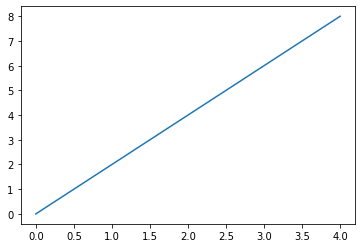

In [85]:
def f(x):
  return 2*x

x = np.array(range(5))
y = f(x)

plt.plot(x, y)
plt.show()

The inpact of y for each x:
* always doble the x
* the inpact of the slope is change in y / change in x

In [86]:
(y[1] - y[0]) / (x[1] - x[0]) # the slope for a linear function

2.0

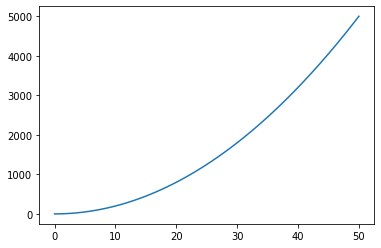

In [87]:
def f_nonlinear(x):
  return 2*x**2

x = np.arange(0, 50, 0.001)
y = f_nonlinear(x)

plt.plot(x, y)
plt.show()

How to measure the inpact of x havng on y in that case?
Calculus says we can use the slope of the tang line

Approximate derivative for f(x) where x= 1 is 4.0001999999987845


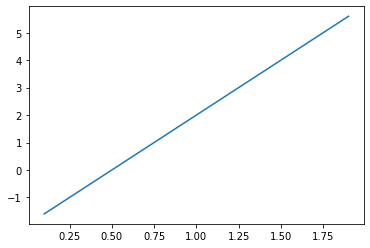

In [88]:
p2_delta = 0.0001
x1 = 1
x2 = x1+p2_delta

y1 = f_nonlinear(x1)
y2 = f_nonlinear(x2)

approximate_derivative = (y2 - y1) / (x2-x1)
approximate_derivative
b = y2 - approximate_derivative*x2

def approximate_tangent_line(x):
  return approximate_derivative*x + b

to_plot = [x1-0.9, x1, x1+0.9]
plt.plot(to_plot, [approximate_tangent_line(point) for point in to_plot])

print("Approximate derivative for f(x)", f"where x= {x1} is {approximate_derivative}")

plt.show()

We calculate the derivative 
We calculate it with 2 verry close points, because the further they are be greater the inaccuracy will be